# Insurance Medical Cost Prediction

**Objective:**

In this challenge, we will explore a U.S. health insurance
dataset, apply the data science lifecycle, and build a machine
learning model that predicts individual medical charges
based on demographic and health-related features

*Part 1: Predicting Medical Charges*

1- Build a model that predicts the medical
charges for each individual based on the other
available features.

- First, implement the model using Gradient
Descent from scratch.

2- Then, build a second version using the
scikit-learn’s model to compare.

- Reflect on how your implementation compares
in terms of performance and complexity.

*Part 2: Predicting Smoker Status*

Build a model that predicts whether an
individual is a smoker or not based on the other
features.

- Start by implementing the model using
Gradient Descent from scratch.

- Then, compare it to a version built with
scikit-learn’s  library.

- Analyze how the model performs and what
patterns it may be capturing.

**Notes on Gradient Descent for both models**

1- Start with a basic implementation using loops to
compute the gradient and update the weights.

2- Once that works, re-implement your solution using a
fully vectorized approach using matrix operations
instead of explicit loops.

3- Vectorization can be more challenging at first, but it
significantly improves performance and mirrors how
real-world libraries work.



## Dataset Description

The dataset variables include:

- age: Age of the beneficiary

- sex: Gender (female/male)

- bmi: Body Mass Index

- children: Number of dependents

- smoker: Whether the individual smokes

- region: Residential region

- charges: Medical cost (Target variable)

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Load the data

You can find the dataset [here](https://github.com/zaka-ai/medical-cost-prediction).

This is a Github repo where you can store multiple types of files and load them into your virtual disk by cloning the git repo with `!git clone [link to repo]`. From there we can change the working directory to point to the path of the folder where the dataset we want to work on resides.

In [ ]:
# clone git repo
!git clone https://github.com/zaka-ai/medical-cost-prediction

# change working directory
%cd medical-cost-prediction/data/

Cloning into 'medical-cost-prediction'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 3), reused 14 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 23.42 KiB | 11.71 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/medical-cost-prediction/data


#### Read & visualize data
Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.

In [ ]:
#read CSV file in Pandas
data = pd.read_csv('insurance.csv')

#display first 10 rows
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

In [ ]:
#get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Check for duplicate Rows**

In [ ]:
#Check for duplicate rows
print("Duplicate rows before removal:", data.duplicated().sum())

Duplicate rows before removal: 1


In [ ]:
#Remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#Confirm removal
print("Duplicate rows after removal:", data.duplicated().sum())

Duplicate rows after removal: 0


**Check for outliers**

In [ ]:
#Detect Outliers using IQR
#define numeric columns to check
numeric_cols = ['bmi', 'charges']

#Dictionary for outlier counts
outlier_counts = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    #Count outliers
    count = data[(data[col] < lower) | (data[col] > upper)].shape[0]
    outlier_counts[col] = count

#Print the outliers per column
print("Outlier count per column (before removal):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier count per column (before removal):
bmi: 9
charges: 139


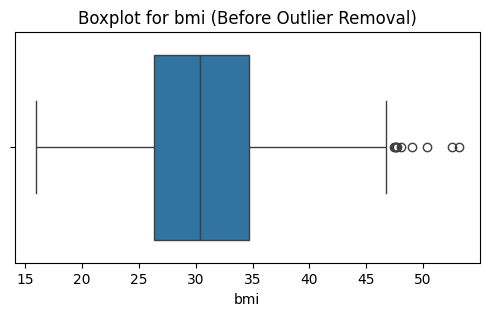

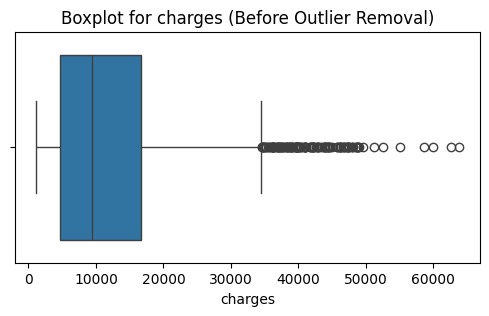

In [ ]:
#Boxplot to visualize outliers
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col} (Before Outlier Removal)')
    plt.show()

A total of 139 outliers were detected in the charges column and 9 in bmi. These values likely reflect real high-cost medical cases, often linked to smokers or severe conditions.




In Part I (regression), we kept the outliers since they significantly improved performance by preserving important variance in charges.

In contrast, for Part II (classification), these outliers harmed model accuracy and precision by introducing noise and overlap between smokers and non-smokers, so we removed them.

This highlights that the effect of outliers depends on the target variable and modeling goal.

We therefore tailored preprocessing: kept outliers for regression (Part I), and removed them for classification using a data copy (Part II).

**Check missing values per column**

In [ ]:
print('missing values per column')
print(data.isnull().sum())

missing values per column
age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


**Handling Missing values in bmi**

In [ ]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

<ipython-input-13-1997496975>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [ ]:
print(data.isnull().sum()) #check if all missing values are filled now

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No more missing values!

**Unused columns removal**

In [ ]:
#dropping the region feature
data.drop('region', axis=1, inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


The region column was removed since it didn't provide meaningful predictive power for the target variables.

**Visualizing Class Imbalance**

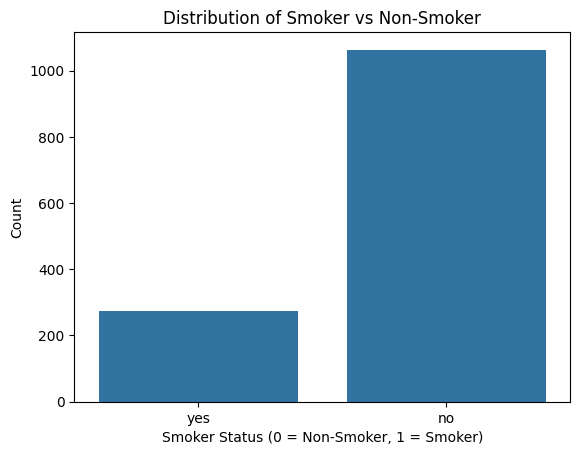

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Count Plot
sns.countplot(x='smoker', data=data)
plt.title('Distribution of Smoker vs Non-Smoker')
plt.xlabel('Smoker Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Count')
plt.show()

This graph shows a significant class imbalance, where non-smokers are dominant compared to smokers in this dataset.

To solve this, class weights is applied during model training (in Part II specifically) to ensure the minority class (smokers) is not ignored.

##3. Convert Categorical columns to numerical

- We need to convert the sex column from male/female to 0/1.
- In addition, the smoker column from no/yes to 0/1.



Let's start with the' sex' column

In [ ]:
#define dictionary
gender = {'male':0, 'female':1}
#replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])
#print head to verify
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,yes,16884.92400
1,18,0,33.770,1,no,1725.55230
2,28,0,33.000,3,no,4449.46200
3,33,0,22.705,0,no,21984.47061
4,32,0,28.880,0,no,3866.85520


Now, the 'smoker' column

In [ ]:
#define dictionary
smokers = {'no':0, 'yes':1}
#replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
#print head to verify
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


**Correlation Heatmap**

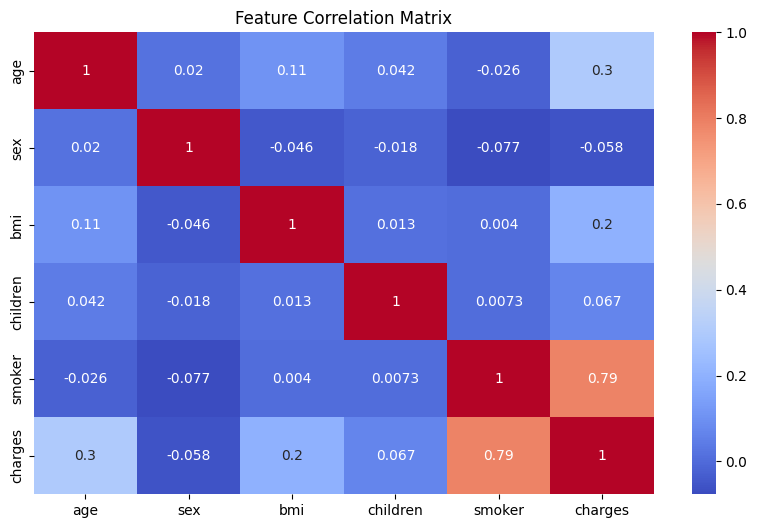

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Smoker is strongly correlated with charges (correlation = 0.79), indicating that smoking significantly affects medical costs.

Age and bmi also show moderate positive correlations with charges, while other features have weak correlations.

## 4. Model Training & Testing

#Part I - Predicting Medical Charges

#Version 1-  Using Gradient Descent (from scratch)

*Loops Version*

In [ ]:
def Gradient_descent_multi(x, y, learning_rate, nb_iterations, initial_a0, initial_a1):
    n = x.shape[0]
    a0 = initial_a0
    a1 = initial_a1.copy()

    for i in range(nb_iterations):
        y_pred = x.dot(a1) + a0
        error = y - y_pred

        a0_der = -2 * np.sum(error) / n
        a1_der = -2 * x.T.dot(error) / n

        a0 -= learning_rate * a0_der
        a1 -= learning_rate * a1_der

    return a0, a1


Prepare full features dataset

In [ ]:
#Features: all except 'charges' which is our target here
X = data.drop(columns=['charges'])
y = data['charges'].values.reshape(-1, 1)

#Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train the model

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

initial_a0 = 0
initial_a1 = np.zeros((x_train.shape[1], 1))
learning_rate = 0.01
iterations = 1000

a0, a1 = Gradient_descent_multi(x_train, y_train, learning_rate, iterations, initial_a0, initial_a1)


Model Evaluation

In [ ]:
y_pred = x_test.dot(a1) + a0

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 35892261.990519114
MAE: 4197.098423914902
R² Score: 0.8046744080103319


Print Learning Equation

In [ ]:
print(f"charges = {a0:.4f}", end="")

for i, name in enumerate(X):
    coef = a1[i][0]
    print(f" + ({coef:.4f} * {name})", end="")
#This is our learned model in equation form using normalized data

charges = 13190.0811 + (3499.7538 * age) + (41.9864 * sex) + (1865.6212 * bmi) + (647.6162 * children) + (9304.6479 * smoker)

##Visualize what was done by Gradient Descent


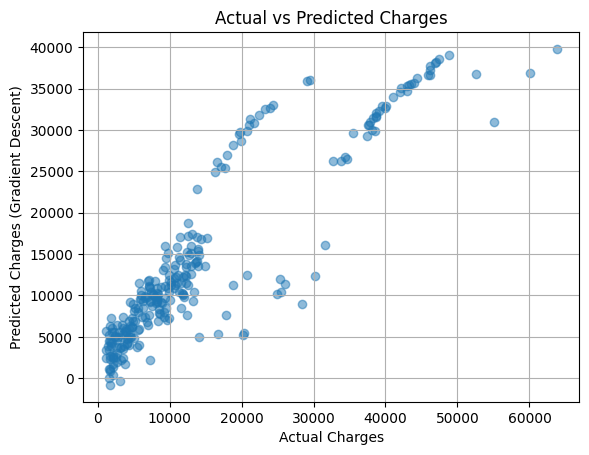

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges (Gradient Descent)")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.show()

*Fully vectorized approach*

In [ ]:
def Gradient_descent_multi_vectorized(X, y, learning_rate, nb_iterations, initial_a0, initial_a1):
    n = X.shape[0]
    a0 = 0
    a1 = np.zeros((X.shape[1], 1))

    for j in range(nb_iterations):
        y_pred = np.dot(X, a1) + a0
        error = y - y_pred

        gradients = (-2 / n) * np.dot(X.T, error)
        bias_gradient = (-2 / n) * np.sum(error)

        a1 -= learning_rate * gradients
        a0 -= learning_rate * bias_gradient

    return a0, a1


In [ ]:
#Prepare full dataset
#Features: all except 'charges' which is our target here
X = data.drop(columns=['charges'])
y = data['charges'].values.reshape(-1, 1)

#Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train the model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

initial_a0 = 0
initial_a1 = np.zeros((x_train.shape[1], 1))
learning_rate = 0.01
iterations = 1000

a0, a1 = Gradient_descent_multi_vectorized(x_train, y_train, learning_rate, iterations, initial_a0, initial_a1)


In [ ]:
#model evaluation
y_pred = np.dot(x_test, a1) + a0

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 35892261.990519114
MAE: 4197.098423914902
R² Score: 0.8046744080103319


In [ ]:
#print the Learning Equation
print(f"charges = {a0:.4f}", end="")

for i, name in enumerate(X):
    coef = a1[i][0]
    print(f" + ({coef:.4f} * {name})", end="")
#This is our learned model in equation form using normalized data

charges = 13190.0811 + (3499.7538 * age) + (41.9864 * sex) + (1865.6212 * bmi) + (647.6162 * children) + (9304.6479 * smoker)

#Version 2- Using the scikit-learn’s model

#### Data splits

Before training, we need to split data into training (80%) & testing (20%)

In [ ]:
#split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Linear Regression Modeling

In [ ]:
#define our regression model
model = LinearRegression()

#train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


#### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Make predictions on the test set
y_pred = model.predict(x_test)
print(f'Model score (R²): {model.score(x_test, y_test):.4f}')
print(f'MAE:{mean_absolute_error(y_test, y_pred): .4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')

Model score (R²): 0.8047
MAE: 4197.0984
MSE: 35892261.5657


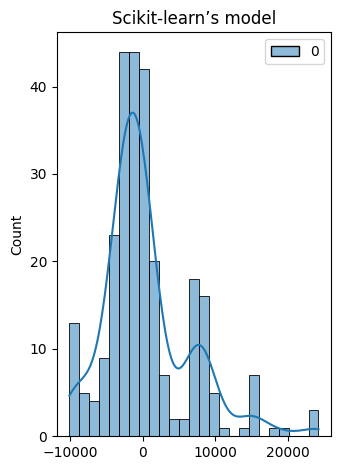

In [ ]:
#Residuals
plt.subplot(1, 2, 1)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Scikit-learn’s model')
plt.tight_layout()
plt.show()

The error distribution of the model is approximately centered around zero, indicating a good overall fit.

Most predictions cluster closely to the true values, with relatively few extreme errors, supporting the model’s effectiveness and the R² of 0.8047.

### - Reflection on Part I -
Both the gradient descent implementation and the scikit-learn model achieved an R² score of 0.8047, indicating that about 80.47% of the variance in medical charges can be explained by the available features.


The  MSE (approximately = 35 million) confirms that our gradient descent implementation was correct and performs just as well as the optimized scikit-learn version.

However, the scikit-learn version was simpler, faster, and more efficient, highlighting the benefits of using built-in libraries for real-world tasks.



# Part II - Predicting Smoker Status

#Version 1-  Using Gradient Descent (from scratch)



In [ ]:
data_classification = data.copy()

In [ ]:
#remove the outliers using IQR method
for col in numeric_cols:
    Q1 = data_classification[col].quantile(0.25)
    Q3 = data_classification[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data_classification = data_classification[(data_classification[col] >= lower) & (data_classification[col] <= upper)]

print("Outliers removed for smoker classification.")

Outliers removed for smoker classification.


In [ ]:
print("Remaining rows after outlier removal:", data_classification.shape[0]) #double check

Remaining rows after outlier removal: 1190


Prepare features and target

In [ ]:
#Go back to raw features (no X_scaled reuse)
X_df = data_classification.drop(columns=['smoker'])  #this is a DataFrame unscaled features
X = X_df.values  #and this becomes a NumPy array our actual input
y = data_classification['smoker'].values.astype(int) #target variable - binary classification

Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

Apply scaling ONLY on training and testing separately

In [ ]:
#scale each set separately
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train_raw)
x_test = scaler.transform(X_test_raw)

Sigmoid and Gradient Descent function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(v):
  return 1/(1+np.exp(-v))

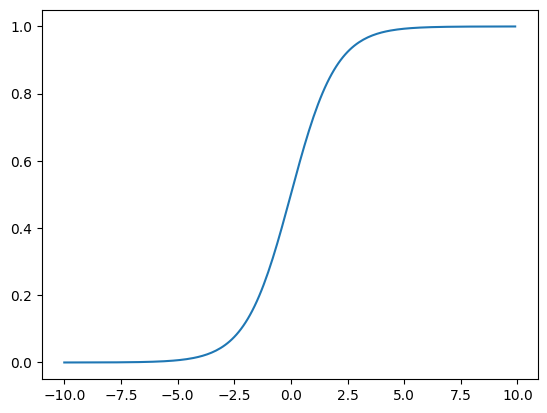

In [ ]:
x = np.arange(-10,10,0.1)
y = sigmoid (x)
plt.plot(x,y)

*Loops version*

In [ ]:
def Gradient_descent_logistic_weighted(x, y, learning_rate, nb_iterations, initial_a0, initial_a1): #with class weights since imbalanced data
    n = x.shape[0]
    a0 = initial_a0
    a1 = initial_a1.copy()

    #Compute class weights
    n_positive = np.sum(y == 1)
    n_negative = np.sum(y == 0)
    w_pos = n / (2 * n_positive)
    w_neg = n / (2 * n_negative)

    for i in range(nb_iterations):
        z = x.dot(a1) + a0
        y_pred = sigmoid(z)
        error = y.reshape(-1, 1) - y_pred

        weights = np.where(y.reshape(-1, 1) == 1, w_pos, w_neg)
        weighted_error = weights * error

        a0_der = -np.sum(weighted_error) / n
        a1_der = -x.T.dot(weighted_error) / n

        a0 -= learning_rate * a0_der
        a1 -= learning_rate * a1_der

    return a0, a1

Model Training

In [ ]:
#Initialize parameters
initial_a0 = 0
initial_a1 = np.zeros((x_train.shape[1], 1))
learning_rate = 0.1
iterations = 1000

#Fit model
a0, a1 = Gradient_descent_logistic_weighted(x_train, y_train, learning_rate, iterations, initial_a0, initial_a1)


Predict and format output

In [ ]:
y_pred_probs = sigmoid(x_test.dot(a1) + a0)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

Print the learned equation

In [ ]:
feature_names = X_df.columns.tolist()
print("Logistic Regression Equation:\n")
equation = f"sigmoid({a0:.4f}"
for i, coef in enumerate(a1[:len(feature_names)]):
    equation += f" + ({coef[0]:.4f} * {feature_names[i]})"
equation += ")"
print(equation)

Logistic Regression Equation:

sigmoid(-2.8027 + (-1.3160 * age) + (-0.1210 * sex) + (-1.3105 * bmi) + (-0.2346 * children) + (2.7891 * charges))


Flatten

In [ ]:
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

Model Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#Basic metrics

print("Accuracy:", accuracy_score(y_test_flat, y_pred_flat))
print("Precision:", precision_score(y_test_flat, y_pred_flat))
print("Recall:", recall_score(y_test_flat, y_pred_flat))
print("F1 Score:", f1_score(y_test_flat, y_pred_flat))

Accuracy: 0.9411764705882353
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


When testing both approaches: Keeping outliers and removing them we saw that:

Removing outliers led to 94.1% accuracy, 66% precision, and 100% recall, with a strong f1-score of 0.8.

Keeping outliers dropped performance to 53% accuracy, 22% precision, 45% recall, and f1-score of 0.3.

This shows that removing outliers improved model performance, likely by eliminating noise that confused the classifier.


Confusion metrics and other metrics

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test_flat, y_pred_flat)
print("\nConfusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0
FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
FNR = FN / (FN + TP) if (FN + TP) != 0 else 0

print(f"\nTPR (Recall for smokers): {TPR:.4f}")
print(f"TNR (Recall for non-smokers): {TNR:.4f}")
print(f"FPR: {FPR:.4f}")
print(f"FNR: {FNR:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat, target_names=["Non-Smoker", "Smoker"]))



Confusion Matrix:
[[196  14]
 [  0  28]]

TPR (Recall for smokers): 1.0000
TNR (Recall for non-smokers): 0.9333
FPR: 0.0667
FNR: 0.0000

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       1.00      0.93      0.97       210
      Smoker       0.67      1.00      0.80        28

    accuracy                           0.94       238
   macro avg       0.83      0.97      0.88       238
weighted avg       0.96      0.94      0.95       238



*Fully vectorized version*

In [ ]:
def Gradient_descent_logistic_weighted_vectorized(x, y, learning_rate, nb_iterations,initial_a0, initial_a1):
    n = x.shape[0]
    a0 = 0
    a1 = np.zeros((x.shape[1], 1))

    #Compute class weights
    n_positive = np.sum(y == 1)
    n_negative = np.sum(y == 0)
    w_pos = n / (2 * n_positive)
    w_neg = n / (2 * n_negative)

    y = y.reshape(-1, 1)

    for j in range(nb_iterations):
        z = np.dot(x, a1) + a0
        y_pred = 1 / (1 + np.exp(-z))

        error = y - y_pred
        weights = np.where(y == 1, w_pos, w_neg)
        weighted_error = weights * error

        a0_der = -np.sum(weighted_error) / n
        a1_der = -np.dot(x.T, weighted_error) / n

        a0 -= learning_rate * a0_der
        a1 -= learning_rate * a1_der

    return a0, a1


In [ ]:
#Model training
#Initialize parameters
initial_a0 = 0
initial_a1 = np.zeros((x_train.shape[1], 1))
learning_rate = 0.1
iterations = 1000

#Fit model
a0, a1 = Gradient_descent_logistic_weighted_vectorized(x_train, y_train, learning_rate, iterations, initial_a0, initial_a1)


In [ ]:
#Predict and format output
y_pred_probs = sigmoid(x_test.dot(a1) + a0)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

In [ ]:
#Print the learned equation
feature_names = X_df.columns.tolist()
print("Logistic Regression Equation:\n")
equation = f"sigmoid({a0:.4f}"
for i, coef in enumerate(a1[:len(feature_names)]):
    equation += f" + ({coef[0]:.4f} * {feature_names[i]})"
equation += ")"
print(equation)

Logistic Regression Equation:

sigmoid(-2.8027 + (-1.3160 * age) + (-0.1210 * sex) + (-1.3105 * bmi) + (-0.2346 * children) + (2.7891 * charges))


In [ ]:
#Flatten
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

In [ ]:
#model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#Basic metrics

print("Accuracy:", accuracy_score(y_test_flat, y_pred_flat))
print("Precision:", precision_score(y_test_flat, y_pred_flat))
print("Recall:", recall_score(y_test_flat, y_pred_flat))
print("F1 Score:", f1_score(y_test_flat, y_pred_flat))

Accuracy: 0.9411764705882353
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


In [ ]:
#Confusion Matrix and other metrics
cm = confusion_matrix(y_test_flat, y_pred_flat)
print("\nConfusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0
FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
FNR = FN / (FN + TP) if (FN + TP) != 0 else 0

print(f"\nTPR (Recall for smokers): {TPR:.4f}")
print(f"TNR (Recall for non-smokers): {TNR:.4f}")
print(f"FPR: {FPR:.4f}")
print(f"FNR: {FNR:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat, target_names=["Non-Smoker", "Smoker"]))



Confusion Matrix:
[[196  14]
 [  0  28]]

TPR (Recall for smokers): 1.0000
TNR (Recall for non-smokers): 0.9333
FPR: 0.0667
FNR: 0.0000

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       1.00      0.93      0.97       210
      Smoker       0.67      1.00      0.80        28

    accuracy                           0.94       238
   macro avg       0.83      0.97      0.88       238
weighted avg       0.96      0.94      0.95       238



The model achieved 94% accuracy, with 100% recall for smokers and 93.3% recall for non-smokers.

Precision for smokers is 67%, leading to a strong f1-score of 0.80 despite the class imbalance.

The low false positive rate (6.7%) and zero false negatives indicate a well-balanced and reliable classifier.

#Version 2- Using the scikit-learn’s model

Prepare Features & Target

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop target and unused column to get features
X_df = data_classification.drop(columns=['smoker'])  #features only
X = X_df.values

#Target variable
y = data_classification['smoker'].values.astype(int)

Split Data and Scale Features

In [ ]:
#Split the raw features and target
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train_raw)
x_test = scaler.transform(X_test_raw)

Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

#Handle class imbalance with class_weight='balanced'
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test) #prediction

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9453781512605042
Precision: 0.6829268292682927
Recall: 1.0
F1 Score: 0.8115942028985508


Confusion matrix and other metrics

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

#TPR, TNR, FPR, FNR
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print(f"\nTPR (Recall for smokers): {TPR:.4f}")
print(f"TNR (Recall for non-smokers): {TNR:.4f}")
print(f"FPR: {FPR:.4f}")
print(f"FNR: {FNR:.4f}")

#Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Smoker", "Smoker"]))


Confusion Matrix:
[[197  13]
 [  0  28]]

TPR (Recall for smokers): 1.0000
TNR (Recall for non-smokers): 0.9381
FPR: 0.0619
FNR: 0.0000

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       1.00      0.94      0.97       210
      Smoker       0.68      1.00      0.81        28

    accuracy                           0.95       238
   macro avg       0.84      0.97      0.89       238
weighted avg       0.96      0.95      0.95       238



## - Reflection Part II-

Both the gradient descent and scikit-learn models achieved identical performance, effectively capturing patterns to detect smokers with 100% recall, 68% precision, 95% accuracy, and an f1-score of 0.81.

This indicates the models successfully identified all smokers while maintaining a strong balance between precision and recall.

While the gradient descent approach offers valuable insights, scikit-learn remains more efficient, easier, faster, and scalable for real-world applications.